In [70]:
import itertools

In [71]:
# Define the graph as an adjacency list
graph = {
    'A': ['B','B', 'C', 'C', 'D'],
    'B': ['A','A', 'D'],
    'C': ['A','A', 'D'],
    'D': ['A','B', 'C']
}

# graph = {
#     'A': ['B', 'C'],
#     'B': ['A', 'D'],
#     'C': ['A', 'D'],
#     'D': ['B', 'C']
# }

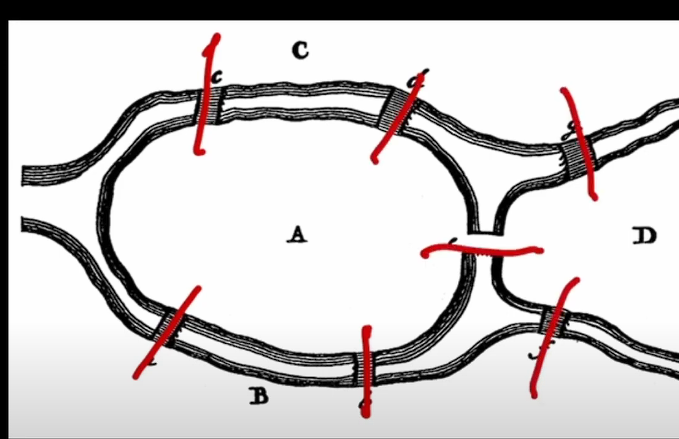

In [72]:
# Function to check if the path is an Eulerian path
def is_eulerian_path(graph, path):
    edges_used = set()
    for i in range(len(path) - 1):
        u, v = path[i], path[i + 1]
        if (u, v) in edges_used or (v, u) in edges_used or v not in graph[u]:
            return False
        edges_used.add((u, v))
    # Ensure all edges in the graph are used
    total_edges = sum(len(neighbors) for neighbors in graph.values()) // 2
    return len(edges_used) == total_edges


In [73]:

# Check if the graph can have an Eulerian path
def can_have_eulerian_path(graph):
    odd_degree_nodes = [node for node, neighbors in graph.items() if len(neighbors) % 2 == 1]
    return len(odd_degree_nodes) == 0 or len(odd_degree_nodes) == 2


In [74]:
# Find all possible paths
def find_all_paths(graph, start):
    def dfs(current, path):
        if len(path) == len(nodes) + 1:
            yield path
        for neighbor in graph[current]:
            if (current, neighbor) not in visited and (neighbor, current) not in visited:
                visited.add((current, neighbor))
                yield from dfs(neighbor, path + [neighbor])
                visited.remove((current, neighbor))

    nodes = list(graph.keys())
    visited = set()
    return dfs(start, [start])

In [75]:
# Check if the graph can have an Eulerian path
if not can_have_eulerian_path(graph):
    print("No Eulerian path exists.")
else:
    # Generate all possible paths starting from each node
    for start_node in graph:
        for path in find_all_paths(graph, start_node):
            if is_eulerian_path(graph, path):
                print("Eulerian path found:", path)
                break
        else:
            continue
        break
    else:
        print("No Eulerian path found.")

No Eulerian path exists.
